In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
import string
from sklearn.feature_extraction.text import CountVectorizer
import xgboost as xgb
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import ipywidgets
from pandas.testing import assert_frame_equal
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from catboost import CatBoostClassifier, Pool,CatBoostRegressor
import shap
shap.initjs()

In [2]:
trainset = pd.read_csv('data/train_v7_4.csv')
testset = pd.read_csv('data/test_v7_4.csv')
train, test = train_test_split(trainset, test_size=0.2, random_state=0)



Unnamed: 0                int64
listing_id                int64
accessories_vectors      object
years of warranty         int64
better loan offer         int64
well maintained           int64
low fuel consumption      int64
reg_date                  int64
power                   float64
engine_cap              float64
mileage                 float64
no_of_owners            float64
depreciation            float64
coe                     float64
dereg_value             float64
omv                     float64
arf                     float64
transmission              int64
price                   float64
category                  int64
fuel_type                 int64
type_of_vehicle           int64
make                      int64
model                     int64
dtype: object
Unnamed: 0                int64
listing_id                int64
accessories_vectors      object
years of warranty         int64
better loan offer         int64
well maintained           int64
low fuel consumption      

In [3]:
# list all features used by CatBoost
feature = ['accessories_vectors', 'years of warranty',
 'better loan offer', 'well maintained', 'low fuel consumption', 'reg_date',
 'power', 'engine_cap', 'mileage', 'no_of_owners', 'depreciation', 'coe',
 'dereg_value', 'omv', 'arf', 
 'transmission','make','model', 'category','type_of_vehicle','fuel_type']


train_x = train[feature]
train_y = train['price']
test_x = test[feature]
test_y = test['price']




In [5]:
train_pool = Pool(train_x, 
                  train_y, 
                  cat_features=
                  ['accessories_vectors','type_of_vehicle','fuel_type','category','make','model','transmission',
                          'years of warranty','better loan offer', 'well maintained', 'low fuel consumption']
                     
                 )
# cat_features specify categorical features
# specify the training parameters 
model = CatBoostRegressor(
iterations=1000,
learning_rate=0.1,
max_depth=6,
verbose=100,
early_stopping_rounds=500,
task_type='GPU',
loss_function = 'RMSE',
train_dir = "crossentropy"
)
#train the model, and plot
model.fit(train_pool,plot=True)

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

0:	learn: 121144.6679423	total: 39ms	remaining: 39s
100:	learn: 25908.2980763	total: 3.74s	remaining: 33.3s
200:	learn: 23464.1979441	total: 7.02s	remaining: 27.9s
300:	learn: 20389.7138487	total: 10.5s	remaining: 24.5s
400:	learn: 19085.5601379	total: 14.1s	remaining: 21.1s
500:	learn: 18078.4866081	total: 17.5s	remaining: 17.5s
600:	learn: 17112.2226238	total: 21.1s	remaining: 14s
700:	learn: 16441.2411858	total: 24.8s	remaining: 10.6s
800:	learn: 15811.2024361	total: 28.3s	remaining: 7.03s
900:	learn: 15566.6235117	total: 31.9s	remaining: 3.5s
999:	learn: 15222.7107541	total: 35.5s	remaining: 0us


In [6]:
# use shap packet to anaysis
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_x)

In [7]:
shap.force_plot(explainer.expected_value, shap_values[:1000,:], train_x.iloc[:1000,:])

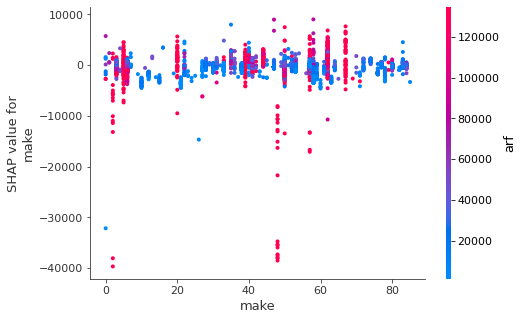

In [8]:
shap.dependence_plot("make", shap_values, train_x)

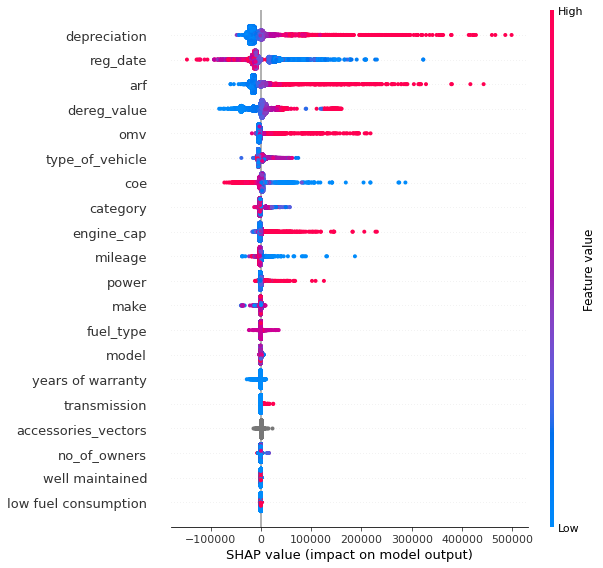

In [9]:
shap.summary_plot(shap_values, train_x)

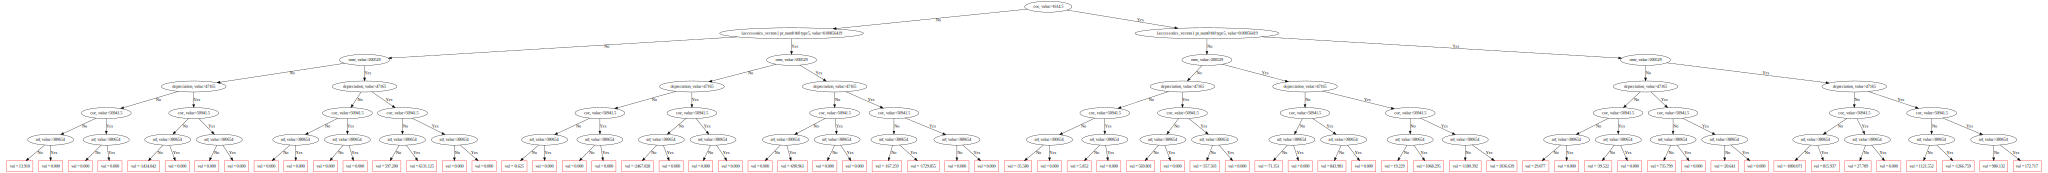

In [10]:
model.plot_tree(tree_idx=800, pool=train_pool)

In [13]:
# output submit files
test_pool = Pool(testset[feature], 
                 cat_features=['accessories_vectors','type_of_vehicle','fuel_type','category','make','model','transmission',
                          'years of warranty','better loan offer', 'well maintained', 'low fuel consumption']
                ) 

preds = model.predict(test_pool)
df = pd.DataFrame(data=preds,index=np.arange(5000))
# df = df.reset_index()
df.columns = ["Predicted"]
print(df)
df.to_csv("submit.csv")

          Predicted
0     146283.434203
1     261382.101319
2     228318.890563
3     159994.274032
4      68320.808240
...             ...
4995   64884.122234
4996  157379.461844
4997   68272.522196
4998   70209.090091
4999   17085.737650

[5000 rows x 1 columns]
